In [7]:
# 1 - Import necessary libraries
import os
import pandas as pd
import random
import matplotlib.pyplot as plt


In [8]:
# 2 - Retrieve the names of the 22 files and assign them to a List variable
# You would need to filter out other files
# Display the names of these 22 files
currfold = os.getcwd()
print(currfold)

/work


In [9]:
# 3 - Write code to randomly select one file name out of the 22 files names. 
# Hint: generate a random integer between 0 and 21 first
# Display the file name
file_list = os.listdir()
file_list

['.deepnote', 'data', 'week08_690.ipynb', 'init.ipynb']

In [10]:
file_list = os.listdir("/work/data/Raw Data Files")
file_list

['MERGED2016_17_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2010_11_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1999_00_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2011_12_PP.csv',
 'data.yaml',
 'MERGED2007_08_PP.csv',
 'MERGED2004_05_PP.csv',
 'Crosswalks.zip',
 'MERGED2015_16_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2000_01_PP.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'MERGED2002_03_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'MERGED1997_98_PP.csv']

In [11]:

ran= random.randint(0,21)
ran_file=file_list[ran]
print(ran_file)

MERGED2010_11_PP.csv


In [12]:
# 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")

path = "./data/Raw Data Files/"+str(ran_file)
df = pd.read_csv(path,usecols=["TUITIONFEE_IN","INSTNM"])
df.head()

,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
1,Alabama A & M University,5800.0
2,University of Alabama at Birmingham,5806.0
3,Amridge University,8360.0
4,University of Alabama in Huntsville,7492.0


In [13]:
# from this file into a data frame and display use info() function to display a summary information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7470 non-null   object 
 1   TUITIONFEE_IN  4337 non-null   float64
dtypes: float64(1), object(1)
memory usage: 116.8+ KB


In [14]:
# 5 - Find out how many observations have missing value.

missing_value=df.isna().sum()
missing_value

INSTNM              0
TUITIONFEE_IN    3133
dtype: int64

In [15]:
# 6 - Drop those observations with missing value
# Disaply the number of observations afterward
df=df.dropna()
df

,INSTNM,TUITIONFEE_IN
1,Alabama A & M University,5800.0
2,University of Alabama at Birmingham,5806.0
3,Amridge University,8360.0
4,University of Alabama in Huntsville,7492.0
5,Alabama State University,7164.0
...,...,...
7465,Strayer University-Charleston Campus,14085.0
7466,Strayer University-Irving,14085.0
7467,Strayer University-Katy,14085.0
7468,Strayer University-Northwest Houston,14085.0


In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4337 entries, 1 to 7469
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4337 non-null   object 
 1   TUITIONFEE_IN  4337 non-null   float64
dtypes: float64(1), object(1)
memory usage: 101.6+ KB


In [17]:
# 7 - Find out how many observations have 0 tution.
observation = (df['TUITIONFEE_IN']==0).value_counts()
observation

False    4332
True        5
Name: TUITIONFEE_IN, dtype: int64

In [18]:
# 8 - Drop those observations with 0 tuition
# Disaply the number of observations afterward
df=df[df['TUITIONFEE_IN']!=0]


In [19]:
# 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations
average_of_tutions=df["TUITIONFEE_IN"].mean()
average_of_tutions

12544.819252077563

In [20]:
# 10 - Randomly select just 1 observation from the data frame.
# Display the tuition of that observation.
ran_obs=random.randint(0,len(df))
df.iloc[ran_obs]

INSTNM           National American University-Zona Rosa
TUITIONFEE_IN                                   12565.0
Name: 6354, dtype: object

In [21]:

obs_tution=df['TUITIONFEE_IN'].iloc[ran_obs]
obs_tution

12565.0

In [22]:
# 11 - Calculate the different between the tuition of this observation and 
# the mean tuition off all observations calculated earlier.
# Display the difference
difference=obs_tution-average_of_tutions
difference

20.18074792243715

In [23]:
# 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means
def repeat_diff(dataFrame,avg,num):
    for i in range(0,num):
        ran_obs=random.randint(0,len(dataFrame))
        obs_tution=dataFrame['TUITIONFEE_IN'].iloc[ran_obs]
        difference=obs_tution-avg
        print(difference)


repeat_diff(df,average_of_tutions,10)

5455.180747922437
-11024.819252077563
4389.180747922437
-11806.819252077563
-6840.819252077563
8595.180747922437
7945.180747922437
-7380.819252077563
5503.180747922437
-9434.819252077563


In [24]:
# 13 - Randomly select 20 observations, display the tuition of these observation.
df1= df.sample(20)
tution_20= df1["TUITIONFEE_IN"]
tution_20

4932    10440.0
2022    30489.0
7309    10950.0
338       764.0
259     11232.0
4391     6973.0
4226     3566.0
1286    12135.0
3485     8058.0
4733     7490.0
293     22692.0
3649     3506.0
3431    24582.0
429       816.0
5720    14344.0
451     17000.0
3151     4470.0
1659     7075.0
2654    27740.0
1214     2610.0
Name: TUITIONFEE_IN, dtype: float64

In [25]:
# 14 - Calculate and displat the mean tuition of these 20 observations
mean_20= tution_20.mean()
mean_20

11346.6

In [26]:
# 15 - Calculate  the different between the average tuition of these 20 observations 
# and the mean tuition off all observations calculated earlier.
# Display the difference
difference=average_of_tutions-mean_20
difference

1198.2192520775625

In [27]:

# 16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means 
# Compare these differences with the differences calculated earlier with just 1 observation
# Describe your hunch/conclusion
for i in range(0,13):
    df1= df.sample(20)
    df1=df1.sample(1)
    print (difference-df1["TUITIONFEE_IN"].mean())


-10576.780747922438
-18426.780747922436
-12681.780747922438
-4689.7807479224375
-4120.7807479224375
-2179.7807479224375
-13129.780747922438
-3973.7807479224375
-3742.7807479224375
-2207.7807479224375
-505.7807479224375
-13201.780747922438
-39004.780747922436


In [28]:
# 17 - write function Code here
def sam_difference(x,y):
    y1=y.sample(x)
    mean_all=y['TUITIONFEE_IN'].mean()
    mean_sample=y1['TUITIONFEE_IN'].mean()
    diff_means=mean_all-mean_sample
    return diff_means

In [29]:
# 18 - test the function by passing a sample size and the name of the dataframe
# Dsplay the return of the function
sam_difference(10,df)

-422.3807479224379

In [30]:
# 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes";
# display it to make sure its members are from 1 to 50
sample_sizes=[i for i in range(1,51)]

In [32]:
sample_sizes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [34]:
# 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
# Loop through the list sample_sizes:
# For each element in the sample size list, obtain a random sample of that size from the data frame;
# Calculate the sample mean 
# Calculate the difference between the population mean and the sample mean
# Append the difference to the list "means_diff"
# Display the list "means_diff" after the loop is completed
means_diff=[]
for each in sample_sizes:
    means_diff.append(sam_difference(each,df))
print(means_diff)



[10354.819252077563, -9089.180747922437, 8782.152585410897, 6184.819252077563, 1684.6192520775621, -189.3474145891032, 3080.533537791849, 141.44425207756285, -3247.9585257002145, 1981.9192520775632, -570.2716570133471, 2101.985918744229, -2072.719209460898, 1593.533537791849, 958.2192520775625, 1978.6942520775629, 2681.7604285481502, -2098.2918590335485, 1541.7666204986162, -3729.580747922437, -493.41884316053256, 409.4556157139268, -1994.1372696615672, -987.5557479224371, 238.45925207756227, 615.0115597698714, 3751.152585410897, 590.9621092204197, 3559.2675279396317, 1808.78591874423, 1157.6579617549814, 848.7567520775629, -504.8474145891032, -2222.09251262832, 1494.9906806489907, 3287.3748076331176, -1200.1266938683839, -277.5754847645421, 2630.4346366929476, 1493.7692520775636, -379.6929430443888, 4579.509728268039, 1865.842507891517, 443.75107025938087, 1358.5303631886745, 711.3409912079969, 585.0958478222437, -254.8474145891032, 397.8396602408284, 1799.279252077562]


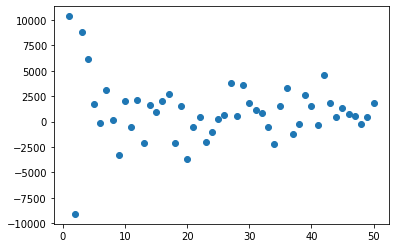

In [35]:

# 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis
# Observe as the sample size increases, the sample means converge to the population mean.
# Make sure you make the plot large enough
plt.scatter(sample_sizes,means_diff)

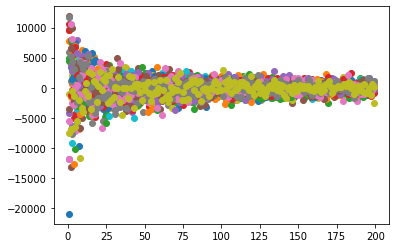

In [36]:
# 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000.
# and see how the plot looks.
for i in range(1,20):
    sample_sizes=[i for i in range(1,200)]
    means_diff=[]
    for each in sample_sizes:
        means_diff.append(sam_difference(each,df))
    plt.scatter(sample_sizes,means_diff)



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=43ddcf5a-71e0-442c-9638-b8aeb031504b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>